In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)

# Predict Attrition

In [3]:
data2 = pd.read_csv('C:/Users/Lenovo/Downloads/HR_Employee_Attrition.csv')
data2.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data2['Attrition'] = data2['Attrition'].replace({'No':0,'Yes':1}) 

<AxesSubplot:>

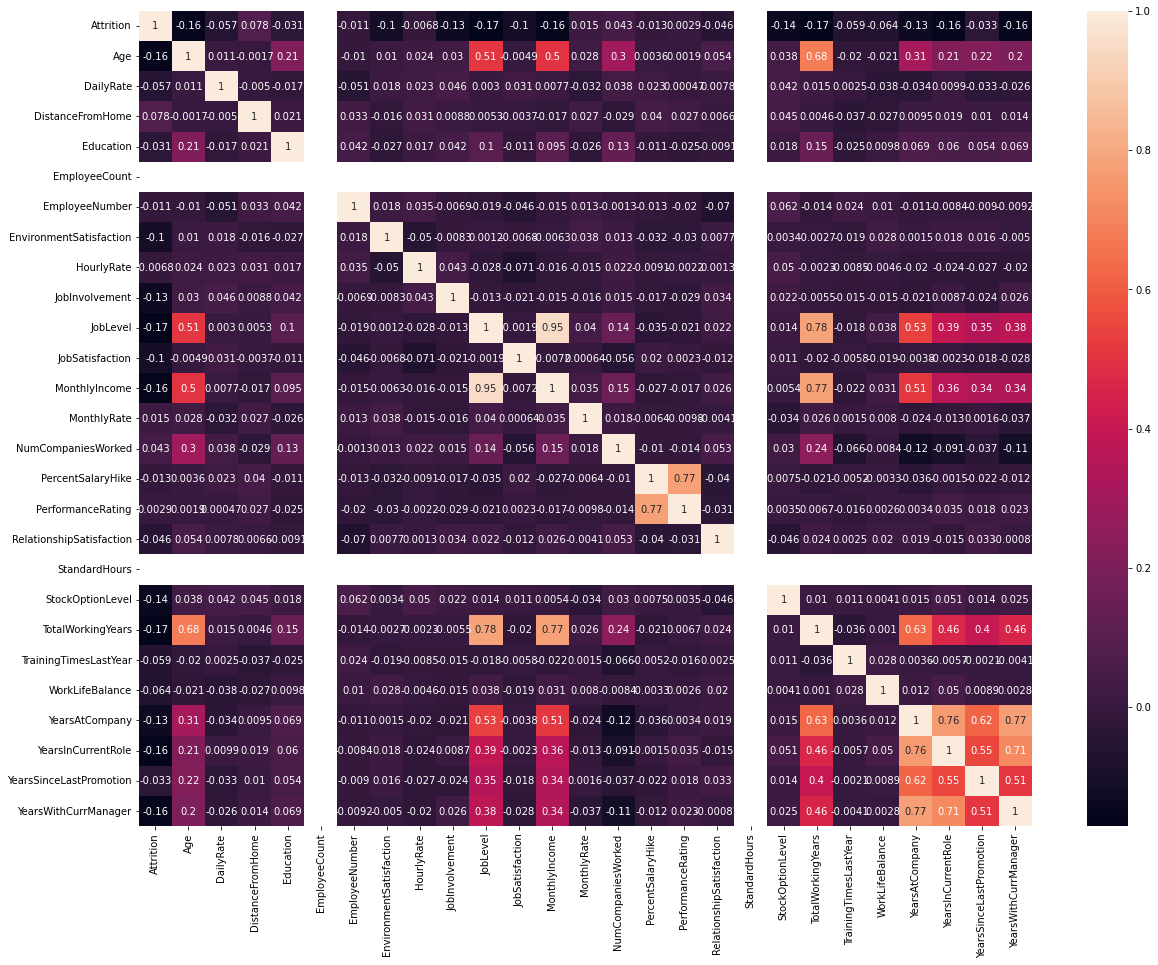

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(data2.corr(), annot=True)

# define x and y 

In [6]:
y2 = data2[['Attrition']]
x2 = data2.drop(labels=('Attrition'),axis=1)

# Separate cat-con

In [7]:
cat2 =[]
con2 =[]
for i in x2.columns:
    if (x2[i].dtypes == 'object'):
        cat2.append(i)
    else:
        con2.append(i)

# Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
p1 = pd.DataFrame(ss.fit_transform(x2[con2]),columns = con2)
p2 = pd.get_dummies(x2[cat2])
xnew2 = p1.join(p2)

In [9]:
xnew2.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,...,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,...,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,-1.150554,-0.426230,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,-0.877232,-0.426230,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,...,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [10]:
y2

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# split

In [11]:
from sklearn.model_selection import train_test_split
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(xnew2,y2,test_size=0.2, random_state=26 )

# Using ANN

In [12]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [13]:
nn = Sequential()
nn.add(Dense(128,activation='relu', input_dim = xnew2.shape[1]))
nn.add(Dense(128, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(xtrain2, ytrain2, validation_split=0.2, epochs=50)

Epoch 1/50
30/30 [==============================] - 0s 13ms/step - loss: 0.4880 - accuracy: 0.8053 - val_loss: 0.4264 - val_accuracy: 0.8263
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.8383 - val_loss: 0.3952 - val_accuracy: 0.8390
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8723 - val_loss: 0.3706 - val_accuracy: 0.8517
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.8904 - val_loss: 0.3656 - val_accuracy: 0.8432
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.8979 - val_loss: 0.3523 - val_accuracy: 0.8432
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.9032 - val_loss: 0.3526 - val_accuracy: 0.8432
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.9191 - val_loss: 0.3720 - val_accuracy: 0.8390
Epoch 8/50
30/30 [=

In [14]:
from sklearn.metrics import accuracy_score
pred = nn.predict_classes(xtest2)
round(accuracy_score(ytest2, pred),3)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.888

# Tuning with Keras Tuner

In [15]:
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(128,activation='relu', input_dim = xnew2.shape[1]))
    p = hp.Int("units", min_value=64, max_value = 512, step = 32 )
    nn.add(Dense(units = p))
    q = hp.Choice("rate", values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    nn.add(Dropout(rate = q))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
    return nn
   

In [19]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                 objective = 'val_accuracy',
                     max_epochs = 10,
                     directory= 'C:/Users/Lenovo/Downloads/KT7',
                     project_name = 'HRA')                 

In [20]:
es = EarlyStopping(monitor = 'val_loss', patience = 20)

In [21]:
tuner.search(xtrain2, ytrain2, callbacks = [es], epochs = 50, validation_split = 0.2)

Trial 30 Complete [00h 00m 01s]
val_accuracy: 0.8432203531265259

Best val_accuracy So Far: 0.8432203531265259
Total elapsed time: 00h 00m 26s
INFO:tensorflow:Oracle triggered exit


In [22]:
tuner.get_best_hyperparameters(num_trials=1)[0].get('units')

352

In [23]:
tuner.get_best_hyperparameters()[0].get("rate")

0.1

In [24]:
nn = Sequential()
nn.add(Dense(128,activation='relu', input_dim = xnew2.shape[1]))
nn.add(Dropout(0.1))
nn.add(Dense(352, activation='relu'))
nn.add(Dropout(0.1))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(xtrain2, ytrain2, validation_split=0.2, epochs=50)

Epoch 1/50
30/30 [==============================] - 0s 5ms/step - loss: 0.4505 - accuracy: 0.8255 - val_loss: 0.4374 - val_accuracy: 0.8263
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8457 - val_loss: 0.3977 - val_accuracy: 0.8432
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8745 - val_loss: 0.3697 - val_accuracy: 0.8475
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.8830 - val_loss: 0.3723 - val_accuracy: 0.8475
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.8947 - val_loss: 0.3639 - val_accuracy: 0.8475
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9128 - val_loss: 0.3861 - val_accuracy: 0.8644
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9245 - val_loss: 0.3944 - val_accuracy: 0.8475
Epoch 8/50
30/30 [==

In [25]:
pred = nn.predict_classes(xtest2)
round(accuracy_score(ytest2, pred),4)

0.8741

In [26]:
ytest2[['Predicted']] = pred
ytest2

,Attrition,Predicted
1402,0,0
1223,1,1
1415,0,0
997,1,0
724,0,0
...,...,...
625,0,0
121,0,0
1349,0,0
429,0,0
